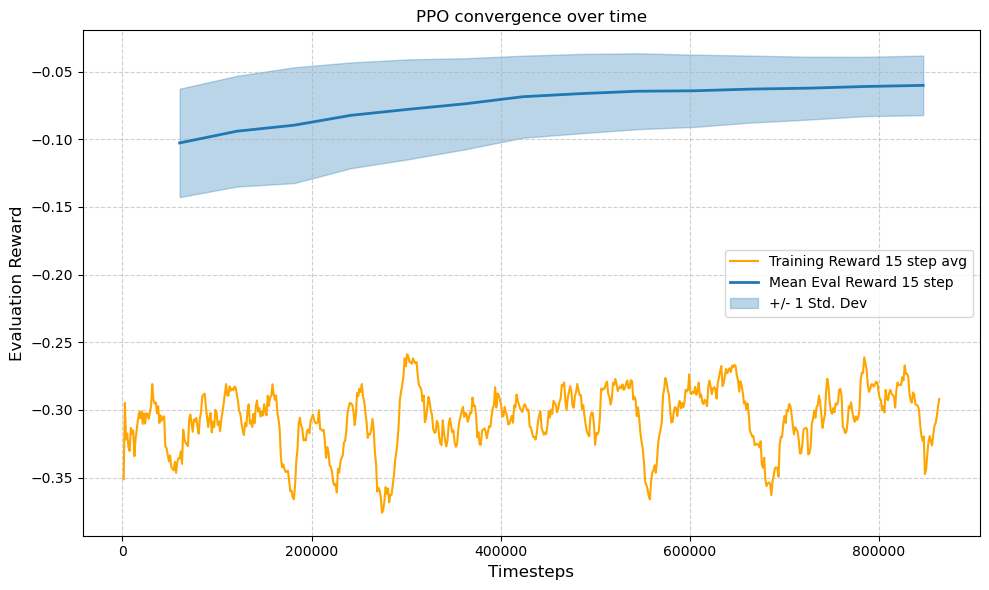

In [44]:
###############################
#   Imports, uninteresting    #
###############################
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

# Open and unpack the eval file into timeseries, insert filepath below
data = np.load('./logs/eval_logs/xsbig/evaluations.npz') #<-  Set file path here!

timesteps = data['timesteps'].flatten()
mean_rewards = data['results'].mean(axis = 1)
std_rewards = (data['results']).std(axis = 1)

timesteps_s = pd.Series(timesteps)
mean_s = pd.Series(mean_rewards)
std_s = pd.Series(std_rewards)

# Open and load training reward
trainR = []
trainT = []
with open('logsxsbig.monitor.csv') as fp: #<- Set file path here!
    next(fp)
    readbuffer = csv.DictReader(fp)
    for line in readbuffer:
        trainR.append(float(line['r']))
        trainT.append(float(line['l']))

mean_smoothed = mean_s.rolling(window = 15, min_periods=1).mean()
std_smoothed = std_s.rolling(window=15, min_periods=1).mean()

reward_smthd = pd.Series(trainR).rolling(window=15, min_periods=1).mean()

# Plot figure
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(trainT), reward_smthd, color = 'orange', label = 'Training Reward 15 step avg')
plt.plot(timesteps_s, mean_smoothed, label = 'Mean Eval Reward 15 step', linewidth = 2)
plt.fill_between(timesteps_s, mean_smoothed - std_smoothed, mean_smoothed + std_smoothed, alpha = 0.3, label = '+/- 1 Std. Dev', color = 'tab:blue')
plt.xlabel('Timesteps', fontsize = 12)
plt.ylabel('Evaluation Reward', fontsize = 12)
plt.title('PPO convergence over time')
plt.grid(True, linestyle = '--', alpha = 0.6)
#plt.ylim([-0.2,0]) # Same ylim for all runs
#plt.xlim([0,3e6])
plt.legend()
plt.tight_layout()
plt.show()